In [106]:
import pandas as pd
import numpy as np
import skbio
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.formula.api import ols
import researchpy as rp
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

In [58]:
date = '26.11.19'

In [60]:
luminescence_means = f'../../../../data/luminescence/to_be_sorted/{date}/output_means.csv'
luminescence_raw = f'../../../../data/luminescence/to_be_sorted/{date}/output_raw.csv'

In [62]:
luminescence_means_df = pd.read_csv(luminescence_means, header=0)
luminescence_raw_df = pd.read_csv(luminescence_raw, header=0)

In [63]:
luminescence_means_df

,name,condition,mean_luminescence,standard_error,date
0,25+72,N-free K3G1,1.151724,0.315713,26.11.19
1,25+72,"W5 then 10 mM KNO3, 2 hours morning",2.808982,1.128901,26.11.19
2,25+72,"W5 then 10 mM Kcl, 2 hours morning",2.328943,0.416367,26.11.19
3,25+72,"W5, 10 mM KNO3_overnight",3.055662,0.405042,26.11.19
4,25+72,replete K3G1,1.091513,0.278987,26.11.19
5,35+72,N-free K3G1,73.431986,5.359028,26.11.19
6,35+72,"W5 then 10 mM KNO3, 2 hours morning",75.081302,9.374357,26.11.19
7,35+72,"W5 then 10 mM Kcl, 2 hours morning",104.291185,26.827104,26.11.19
8,35+72,"W5, 10 mM KNO3_overnight",64.921355,31.885983,26.11.19
9,35+72,replete K3G1,57.306098,8.298701,26.11.19


In [64]:
luminescence_raw_df

,well_row,well_col,content,fluc_luminescence,nluc_luminescence,name,condition,nluc/fluc,date
0,A,1,Sample X1,194107.0,42776456.0,71 + 72,"W5 then 10 mM Kcl, 2 hours morning",220.375648,26.11.19
1,A,2,Sample X7,179901.0,19594833.0,71 + 72,"W5 then 10 mM Kcl, 2 hours morning",108.920089,26.11.19
2,A,3,Sample X13,98180.0,20401916.0,71 + 72,"W5 then 10 mM Kcl, 2 hours morning",207.801141,26.11.19
3,A,4,Sample X19,641555.0,70528823.0,71 + 72,"W5 then 10 mM KNO3, 2 hours morning",109.934180,26.11.19
4,A,5,Sample X24,184769.0,29024550.0,71 + 72,"W5 then 10 mM KNO3, 2 hours morning",157.085604,26.11.19
...,...,...,...,...,...,...,...,...,...
75,H,8,Sample X73,26332.0,1800670.0,35+72,replete K3G1,68.383336,26.11.19
76,H,9,Sample X75,13043.0,814816.0,35+72,replete K3G1,62.471517,26.11.19
77,H,10,Sample X77,34232.0,53161.0,25+72,replete K3G1,1.552962,26.11.19
78,H,11,Sample X79,4447.0,5036.0,25+72,replete K3G1,1.132449,26.11.19


In [ ]:
remove column 12

In [65]:
#add promoter names column
luminescence_raw_df['Promoter'] = luminescence_raw_df.name 

In [109]:
luminescence_raw_df.loc[luminescence_raw_df.name == '71 + 72', 'Promoter'] = 'UBQ10'
luminescence_raw_df.loc[luminescence_raw_df.name == '71+72', 'Promoter'] = 'UBQ10'
luminescence_raw_df.loc[luminescence_raw_df.name == '25+72', 'Promoter'] = 'NIR1'
luminescence_raw_df.loc[luminescence_raw_df.name == '35+72', 'Promoter'] = 'NOS'
luminescence_raw_df.loc[luminescence_raw_df.name == '36+72', 'Promoter'] = 'STAP4'
luminescence_raw_df.loc[luminescence_raw_df.name == '92+72', 'Promoter'] = 'NRP'
luminescence_raw_df.loc[luminescence_raw_df.name == '92+29+72', 'Promoter'] = 'NRP+NLP7_TF'

In [196]:
#select UBQ10 promoter means
UBQ10_means_old = luminescence_means_df[(luminescence_means_df.name == '71 + 72') | (luminescence_means_df.name == '71+72')].copy()
UBQ10_means_old

,name,condition,mean_luminescence,standard_error,date
14,71 + 72,"W5 then 10 mM KNO3, 2 hours morning",165.309175,34.589967,26.11.19
15,71 + 72,"W5 then 10 mM Kcl, 2 hours morning",179.032293,35.243535,26.11.19
16,71 + 72,"W5, 10 mM KNO3_overnight",118.309783,10.958352,26.11.19
17,71+72,N-free K3G1,107.168545,33.445537,26.11.19
18,71+72,replete K3G1,127.120250,15.427830,26.11.19


In [197]:
#Create correction factor of 179.03/meanluminescence of differing condition for each condition
UBQ10_means_old['correction_factor'] = UBQ10_means.iloc[1][2] / UBQ10_means['mean_luminescence']

In [198]:
UBQ10_means_old.iloc[1][2]

179.03229287563258

In [199]:
UBQ10_means_old

,name,condition,mean_luminescence,standard_error,date,correction_factor
14,71 + 72,"W5 then 10 mM KNO3, 2 hours morning",165.309175,34.589967,26.11.19,1.083015
15,71 + 72,"W5 then 10 mM Kcl, 2 hours morning",179.032293,35.243535,26.11.19,1.000000
16,71 + 72,"W5, 10 mM KNO3_overnight",118.309783,10.958352,26.11.19,1.513250
17,71+72,N-free K3G1,107.168545,33.445537,26.11.19,1.670568
18,71+72,replete K3G1,127.120250,15.427830,26.11.19,1.408370


In [206]:
#select UBQ10:fluc condition means
luminescence_raw_df_means = luminescence_raw_df[['condition', 'fluc_luminescence']].groupby('condition').mean().reset_index()
luminescence_raw_df_means

,condition,fluc_luminescence
0,N-free K3G1,146609.933333
1,"W5 then 10 mM KNO3, 2 hours morning",88288.904762
2,"W5 then 10 mM Kcl, 2 hours morning",62408.117647
3,"W5, 10 mM KNO3_overnight",150213.333333
4,replete K3G1,72379.916667


In [207]:
#Create correction factor of W5, KCl mean/fluc_luminescence of differing condition for each condition
luminescence_raw_df_means['correction_factor'] = luminescence_raw_df_means.iloc[2][1] / luminescence_raw_df_means['fluc_luminescence']

In [208]:
luminescence_raw_df_means.iloc[2][1]

62408.117647058825

In [209]:
luminescence_raw_df_means

,condition,fluc_luminescence,correction_factor
0,N-free K3G1,146609.933333,0.425675
1,"W5 then 10 mM KNO3, 2 hours morning",88288.904762,0.706863
2,"W5 then 10 mM Kcl, 2 hours morning",62408.117647,1.000000
3,"W5, 10 mM KNO3_overnight",150213.333333,0.415463
4,replete K3G1,72379.916667,0.862230


In [210]:
#create new corrected UBQ10:fluc column
#first merge dfs, only adding the correction factor column
luminescence_raw_corrected_fluc = pd.merge(luminescence_raw_df, luminescence_raw_df_means[['condition', 'correction_factor']], on='condition')
#then create corrected_fluc column, fluc multiplied by correction factor
luminescence_raw_corrected_fluc['corrected_fluc'] = luminescence_raw_corrected_fluc['fluc_luminescence'] * luminescence_raw_corrected_fluc['correction_factor']
#correct nluc/fluc:
luminescence_raw_corrected_fluc['corrected_nluc/fluc'] = luminescence_raw_corrected_fluc['nluc_luminescence']/luminescence_raw_corrected_fluc['corrected_fluc']

In [111]:
luminescence_raw_df.condition.unique()

array(['W5 then 10 mM Kcl, 2 hours morning',
       'W5 then 10 mM KNO3, 2 hours morning', 'W5, 10 mM KNO3_overnight',
       'N-free K3G1', 'replete K3G1'], dtype=object)

In [174]:
luminescence_raw_df[luminescence_raw_df.Promoter == 'NRP+NLP7_TF']

,well_row,well_col,content,fluc_luminescence,nluc_luminescence,name,condition,nluc/fluc,date,Promoter,corrected_fluc,corrected_nluc/fluc
60,F,1,Sample X6,40929.0,382303.0,92+29+72,"W5 then 10 mM Kcl, 2 hours morning",9.340639,26.11.19,NRP+NLP7_TF,112840.154746,3.388005
61,F,3,Sample X18,2013.0,17982.0,92+29+72,"W5 then 10 mM Kcl, 2 hours morning",8.932936,26.11.19,NRP+NLP7_TF,95944.034693,0.187422


In [112]:
#set style to ticks
sns.set(style="ticks", color_codes=True)

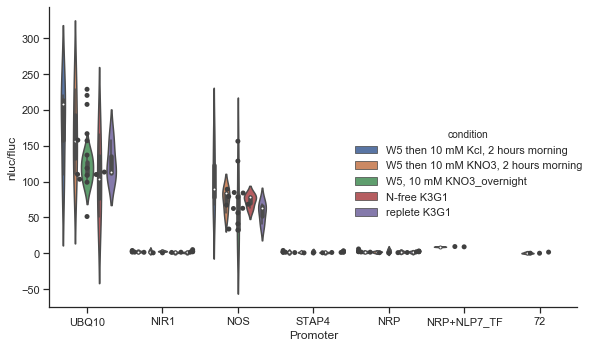

In [113]:
plot = sns.catplot(x="Promoter", y="nluc/fluc", data=luminescence_raw_df, hue='condition', kind='violin')
#plot points
ax = sns.swarmplot(x="Promoter", y="nluc/fluc", data=luminescence_raw_df, color=".25").get_figure().savefig(f'../../../../data/plots/luminescence/{date}/luminescence_violin.pdf', format='pdf')

In [211]:
#remove promoter 72
luminescence_raw_df_no_72 = luminescence_raw_corrected_fluc.copy()
luminescence_raw_df_no_72.Promoter = luminescence_raw_df_no_72.Promoter.mask(luminescence_raw_df_no_72.Promoter == '72')

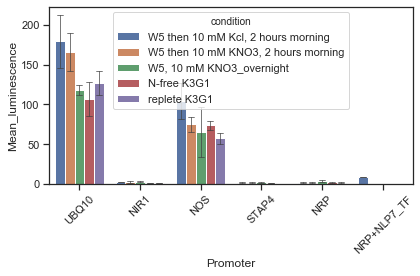

In [212]:

#bar chart, 68% confidence intervals (1 Standard error)
plot = sns.barplot(x="Promoter", y="nluc/fluc", hue="condition", data=luminescence_raw_df_no_72, ci=68, capsize=0.1,errwidth=0.7,n_boot=10000)
plot.set_xticklabels(plot.get_xticklabels(), rotation=45)
plt.ylabel("Mean_luminescence").get_figure().savefig(f'../../../../data/plots/luminescence/{date}/promoter_luminescence.pdf', format='pdf')

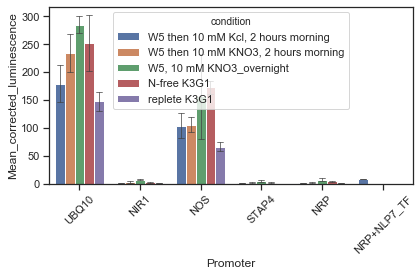

In [213]:
#UBQ10 reacts to each conditions, so use applied correction factor
#bar chart, 68% confidence intervals (1 Standard error)
plot = sns.barplot(x="Promoter", y="corrected_nluc/fluc", hue="condition", data=luminescence_raw_df_no_72, ci=68, capsize=0.1,errwidth=0.7,n_boot=10000)
plot.set_xticklabels(plot.get_xticklabels(), rotation=45)
plt.ylabel("Mean_corrected_luminescence").get_figure().savefig(f'../../../../data/plots/luminescence/{date}/promoter_luminescence_corrected.pdf', format='pdf')

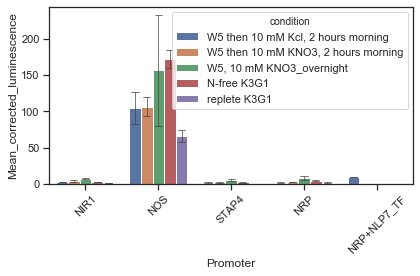

In [214]:
#remove UBQ10 from this
luminescence_raw_df_no_UBQ10 = luminescence_raw_df_no_72.copy()
luminescence_raw_df_no_UBQ10.Promoter = luminescence_raw_df_no_UBQ10.Promoter.mask(luminescence_raw_df_no_UBQ10.Promoter == 'UBQ10')
#plot again
plot = sns.barplot(x="Promoter", y="corrected_nluc/fluc", hue="condition", data=luminescence_raw_df_no_UBQ10, ci=68, capsize=0.1,errwidth=0.7,n_boot=10000)
plot.set_xticklabels(plot.get_xticklabels(), rotation=45)
plt.ylabel("Mean_corrected_luminescence").get_figure().savefig(f'../../../../data/plots/luminescence/{date}/promoter_luminescence_corrected_no_UBQ10.pdf', format='pdf')

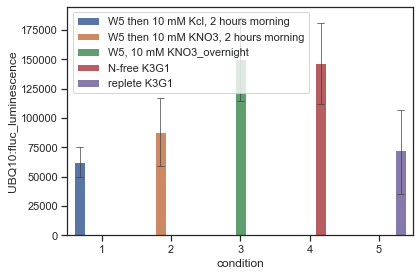

In [215]:
#plot raw UBQ10
plot = sns.barplot(x='condition', hue="condition", y="fluc_luminescence", data=luminescence_raw_df,ci=68,capsize=0.1,errwidth=0.7,n_boot=10000)
#plt.tight_layout(pad=1.0)
#plot.set_xticklabels(plot.get_xticklabels(), rotation=70)
plot.set_xticklabels('12345')
plt.legend(loc='upper left')
plt.ylabel("UBQ10:fluc_luminescence").get_figure().savefig(f'../../../../data/plots/luminescence/{date}/UBQ10fluc_raw.pdf', format='pdf')


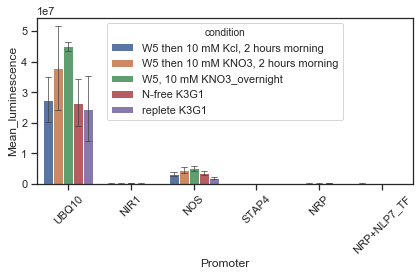

In [217]:
#plot graph with mean nluc on its own
plot = sns.barplot(x="Promoter", y="nluc_luminescence", hue="condition", data=luminescence_raw_df_no_72, ci=68, capsize=0.1,errwidth=0.7,n_boot=10000)
plot.set_xticklabels(plot.get_xticklabels(), rotation=45)
plt.ylabel("Mean_luminescence").get_figure().savefig(f'../../../../data/plots/luminescence/{date}/promoter_luminescence_nluc_mean.pdf', format='pdf')

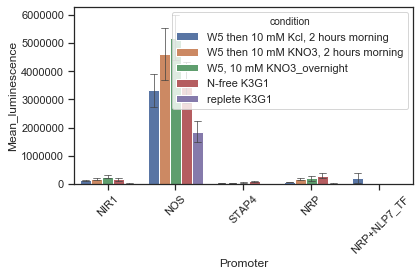

In [218]:
#plot graph with mean nluc on its own - no UBQ10
plot = sns.barplot(x="Promoter", y="nluc_luminescence", hue="condition", data=luminescence_raw_df_no_UBQ10, ci=68, capsize=0.1,errwidth=0.7,n_boot=10000)
plot.set_xticklabels(plot.get_xticklabels(), rotation=45)
plt.ylabel("Mean_luminescence").get_figure().savefig(f'../../../../data/plots/luminescence/{date}/promoter_luminescence_nluc_mean_no_UBQ10.pdf', format='pdf')

### get names of each condition for later

In [20]:
pd.Categorical(luminescence_raw_df.condition)
names = luminescence_raw_df.condition.unique()
for name in names:
    print(name)

nitrate_free
nitrate_2hrs_morning
nitrate_overnight


In [21]:
#get list of promoters
pd.Categorical(luminescence_raw_df.Promoter)
prom_names = luminescence_raw_df.Promoter.unique()
for name in prom_names:
    print(name)

UBQ10
NIR1
NOS
STAP4
NRP


### test normality

In [90]:
#returns test statistic, p-value
for name1 in prom_names:
    for name in names:
        print('{}: {}'.format(name, stats.shapiro(luminescence_raw_df['nluc/fluc'][luminescence_raw_df.condition == name])))


ValueError: Data must be at least length 3.

#### not normal

In [89]:
#test variance
stats.levene(luminescence_raw_df['nluc/fluc'][luminescence_raw_df.condition == names[0]], 
               luminescence_raw_df['nluc/fluc'][luminescence_raw_df.condition == names[1]], 
               luminescence_raw_df['nluc/fluc'][luminescence_raw_df.condition == names[2]])

LeveneResult(statistic=nan, pvalue=nan)

In [77]:
test = luminescence_raw_df.groupby('Promoter')['nluc/fluc'].apply

In [78]:
test

<bound method SeriesGroupBy.apply of <pandas.core.groupby.generic.SeriesGroupBy object at 0x7fc8486a1160>>